In [2]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [11]:
%%time
# change the path if needed
path = '2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)



CPU times: user 1min 18s, sys: 1.08 s, total: 1min 19s
Wall time: 1min 20s


In [17]:
# q1
flights_df.UniqueCarrier.drop_duplicates().shape

(20,)

In [21]:
# q2
flights_df.groupby('Cancelled').size()

Cancelled
0    6872294
1     137434
dtype: int64

In [32]:
# q3
flights_df.iloc[flights_df['DepDelay'].idxmax(axis='index')].Dest

'MSP'

In [33]:
flights_df.iloc[flights_df['ArrDelay'].idxmax(axis='index')].Dest

'MSP'

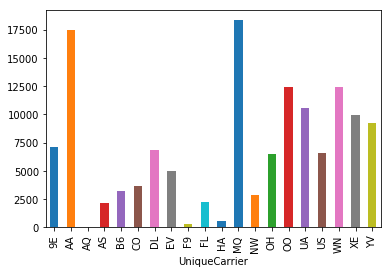

In [34]:
# q4
flights_df.loc[flights_df.Cancelled == 1].groupby('UniqueCarrier').size().plot(kind='bar');

In [37]:
flights_df.loc[flights_df.Cancelled == 1].groupby('UniqueCarrier').size()

UniqueCarrier
9E     7100
AA    17440
AQ       42
AS     2139
B6     3205
CO     3702
DL     6813
EV     5026
F9      303
FL     2236
HA      570
MQ    18331
NW     2906
OH     6462
OO    12436
UA    10541
US     6582
WN    12389
XE     9992
YV     9219
dtype: int64

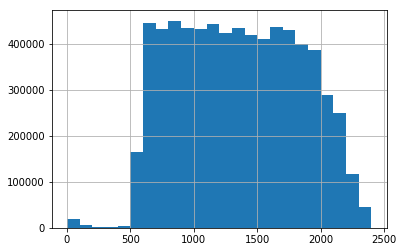

In [41]:
# q5
flights_df.DepTime.hist(bins=24)

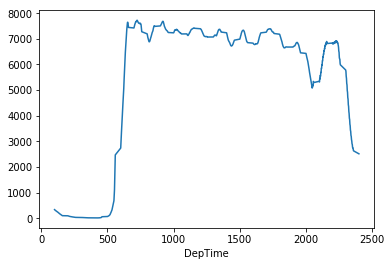

In [54]:
flights_df.groupby('DepTime').size().rolling(window=60).mean().plot()

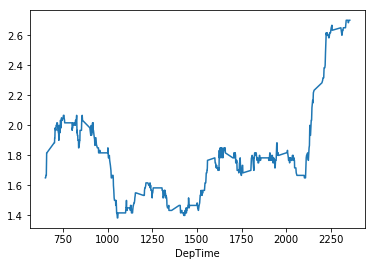

In [55]:
# q6 a = 9pm
flights_df.loc[flights_df.Cancelled==1].groupby('DepTime').size().rolling(window=60).mean().plot()

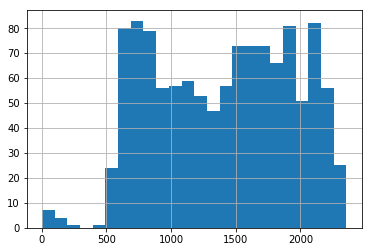

In [59]:
# q7
flights_df.loc[flights_df.Cancelled==1]['DepTime'].hist(bins=24)